## Load Data

In [1]:
import os
from pandas import read_csv

data_dir = '/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul'
original_data = data_dir + '/Original Data'

print(os.listdir(data_dir))
print(os.listdir(original_data))

['Measurement_summary.csv', 'Original Data']
['Measurement_station_info.csv', 'Measurement_item_info.csv', 'Measurement_info.csv']


In [2]:
item_info = read_csv(original_data + '/Measurement_item_info.csv')
print(item_info.shape)
print(item_info.dtypes)
item_info

(6, 7)
Item code                int64
Item name               object
Unit of measurement     object
Good(Blue)             float64
Normal(Green)          float64
Bad(Yellow)            float64
Very bad(Red)          float64
dtype: object


,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [3]:
item_code = item_info['Item code'].tolist()
item_name = item_info['Item name'].tolist()


item_dict = { k:v for (k,v) in zip(item_code, item_name)}
print(item_dict)


{1: 'SO2', 3: 'NO2', 5: 'CO', 6: 'O3', 8: 'PM10', 9: 'PM2.5'}


In [4]:
station_info = read_csv(original_data + '/Measurement_station_info.csv')
print(station_info.shape)
print(station_info.dtypes)
station_info.head()

(25, 5)
Station code                int64
Station name(district)     object
Address                    object
Latitude                  float64
Longitude                 float64
dtype: object


,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [5]:
station_codes = station_info['Station code'].tolist()
station_names = station_info['Station name(district)'].tolist()


station_dict = { k:v for (k,v) in zip(station_codes, station_names)} 
print(station_dict)

{101: 'Jongno-gu', 102: 'Jung-gu', 103: 'Yongsan-gu', 104: 'Eunpyeong-gu', 105: 'Seodaemun-gu', 106: 'Mapo-gu', 107: 'Seongdong-gu', 108: 'Gwangjin-gu', 109: 'Dongdaemun-gu', 110: 'Jungnang-gu', 111: 'Seongbuk-gu', 112: 'Gangbuk-gu', 113: 'Dobong-gu', 114: 'Nowon-gu', 115: 'Yangcheon-gu', 116: 'Gangseo-gu', 117: 'Guro-gu', 118: 'Geumcheon-gu', 119: 'Yeongdeungpo-gu', 120: 'Dongjak-gu', 121: 'Gwanak-gu', 122: 'Seocho-gu', 123: 'Gangnam-gu', 124: 'Songpa-gu', 125: 'Gangdong-gu'}


In [6]:
measurement_info = read_csv(original_data + '/Measurement_info.csv')
print(measurement_info.shape)
print(measurement_info.dtypes)

print('First date:', str(measurement_info['Measurement date'].min()))
print('Last date:', str(measurement_info['Measurement date'].max()))
measurement_info.head()

(3885066, 5)
Measurement date      object
Station code           int64
Item code              int64
Average value        float64
Instrument status      int64
dtype: object
First date: 2017-01-01 00:00
Last date: 2019-12-31 23:00


,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


## Data Cleaning & Processing

- Only keep normal instrument status

Text(0, 0.5, 'Freq / $10^6$')

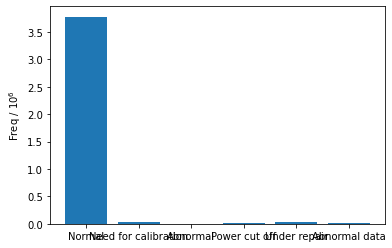

In [7]:
import matplotlib.pyplot as plt
# Note on Instrument status codes
intrument_status = {
    0: 'Normal',
    1: 'Need for calibration',
    2: 'Abnormal',
    4: 'Power cut off',
    8: 'Under repair',
    9: 'Abnormal data',
}


status_freq = measurement_info.groupby('Instrument status').count()
plt.bar(list(intrument_status.values()), status_freq['Average value'].values/10**6)
plt.ylabel(r'Freq / $10^6$')

In [8]:
measurement_info_clean = measurement_info.loc[measurement_info['Instrument status'] == 0]
measurement_info_clean.shape

(3775778, 5)

## Analysing all Stations together


In [9]:
code_to_item = list(item_dict.items())
no_item = len(code_to_item)

print(code_to_item)
print(no_item)

[(1, 'SO2'), (3, 'NO2'), (5, 'CO'), (6, 'O3'), (8, 'PM10'), (9, 'PM2.5')]
6


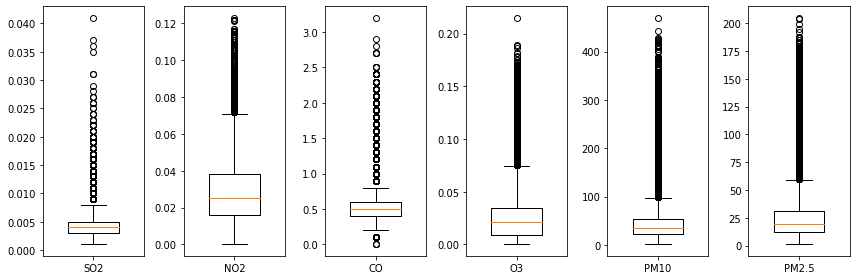

In [10]:
import matplotlib.pyplot as plt

positions = range(1,no_item+1)



# Create main figure

fig = plt.figure(1, figsize = [12,4])
for k in range(no_item):

  # add every single subplot to the figure with a for loop

  ax = fig.add_subplot(1,no_item, positions[k])
  #ax.plot(x,y)     # Or whatever you want in the subplot
  df = measurement_info_clean.loc[measurement_info_clean['Item code'] == code_to_item[k][0]]
  ax.boxplot(df['Average value'], widths=0.5, labels=[code_to_item[k][1]])


fig.tight_layout()

plt.show()

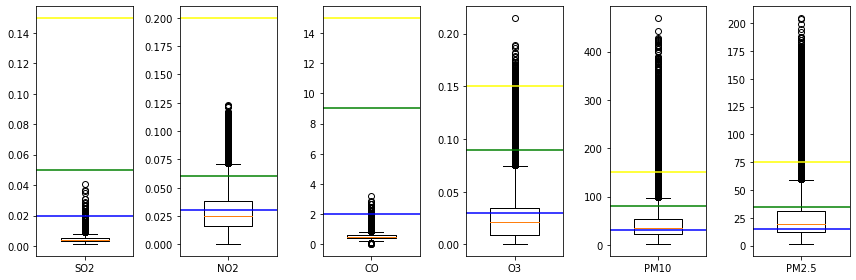

In [11]:

fig = plt.figure(1, figsize = [12,4])
for k in range(no_item):

  # add every single subplot to the figure with a for loop

  ax = fig.add_subplot(1,no_item, positions[k])
  #ax.plot(x,y)     # Or whatever you want in the subplot
  df = measurement_info_clean.loc[measurement_info_clean['Item code'] == code_to_item[k][0]]
  ax.boxplot(df['Average value'], widths=0.5, labels=[code_to_item[k][1]])
  ax.axhline(y=item_info['Good(Blue)'][k], color='blue')
  ax.axhline(y=item_info['Normal(Green)'][k], color='green')
  ax.axhline(y=item_info['Bad(Yellow)'][k], color='yellow')



fig.tight_layout()

plt.show()

Good pollution levels.
Many outliers for pm10, pm2.5, perhaps one of the stations is next to a strong source, or there was a one off strong event?

## Trends

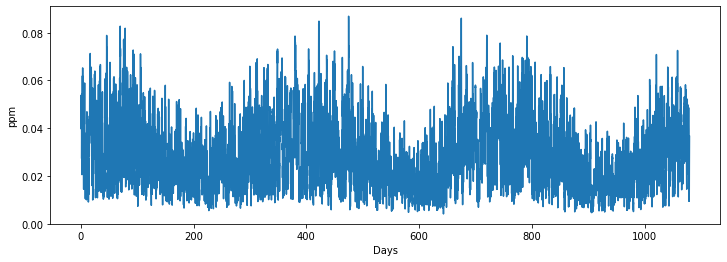

In [12]:
import numpy as np
so2 = measurement_info_clean.loc[measurement_info_clean['Item code'] == 1]
no2 = measurement_info_clean.loc[measurement_info_clean['Item code'] == 3]
co = measurement_info_clean.loc[measurement_info_clean['Item code'] == 5]
o3 = measurement_info_clean.loc[measurement_info_clean['Item code'] == 6]
pm10 = measurement_info_clean.loc[measurement_info_clean['Item code'] == 8]
pm25 = measurement_info_clean.loc[measurement_info_clean['Item code'] == 9]


no2_groupbydates = no2.groupby("Measurement date")["Average value"].mean()
no2_level = no2_groupbydates.values
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(np.arange(0, len(no2_level))/24, no2_level)
plt.xlabel('Days')
plt.ylabel('ppm')
plt.show()
# high in winter - more heating, driving cars?
# lower in summer

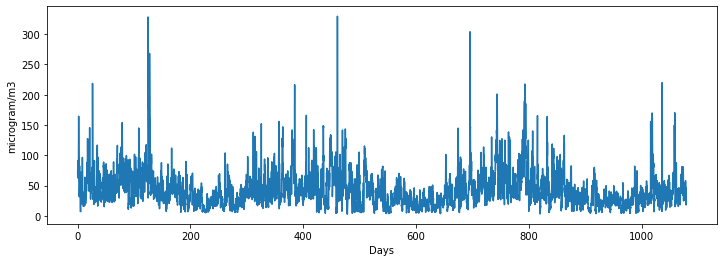

In [13]:
pm10_groupbydates = pm10.groupby("Measurement date")["Average value"].mean()
pm10_level = pm10_groupbydates.values
#plt.rcParams["figure.figsize"] = (12,4)
plt.plot(np.arange(0, len(no2_level))/24, pm10_level)
plt.xlabel('Days')
#plt.xlim([460, 465])
plt.ylabel('microgram/m3')
plt.show()
# some very sharp peaks around 5th may - children's day, and 5th april - arbor day
# 


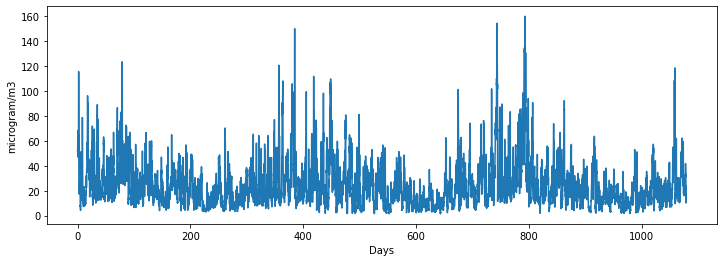

In [14]:
pm25_groupbydates = pm25.groupby("Measurement date")["Average value"].mean()
pm25_level = pm25_groupbydates.values
#plt.rcParams["figure.figsize"] = (12,4)
plt.plot(np.arange(0, len(no2_level))/24, pm25_level)
plt.xlabel('Days')
#plt.xlim([750, 800])
plt.ylabel('microgram/m3')
plt.show()
# some very sharp peaks around 5th may - children's day, and 5th april - arbor day
# coincide with public holidays??

In [15]:
co_groupbydates = co.groupby("Measurement date")["Average value"].mean()
so2_groupbydates = so2.groupby("Measurement date")["Average value"].mean()
o3_groupbydates = o3.groupby("Measurement date")["Average value"].mean()

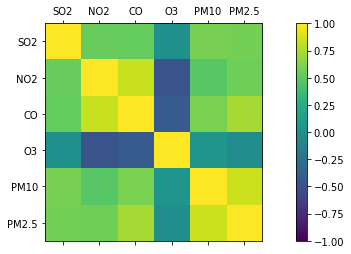

In [16]:
from pandas import concat
horizontal_concat = concat([so2_groupbydates, no2_groupbydates, co_groupbydates, o3_groupbydates, pm10_groupbydates, pm25_groupbydates], axis=1)
correlations = horizontal_concat.corr() 
# plot correlation matrix 
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0, len(item_name))
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(item_name) 
ax.set_yticklabels(item_name)
plt.show()

In [17]:
# pm10, pm2.5 strong correlation
# co, no2 strong correlation

## Grouping Stations for NO2




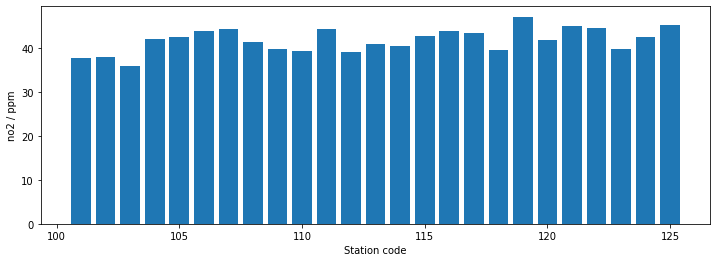

In [18]:
no2 = measurement_info_clean.loc[measurement_info_clean['Item code'] == 3]
no2_groupbydistrict = pm10.groupby(["Station code"])["Average value"].mean()
plt.bar(station_codes, no2_groupbydistrict.values)
plt.ylabel('no2 / ppm')
plt.xlabel('Station code')
plt.show()

In [19]:
station_dict[119], station_dict[103]
# Yongsan-gu lowest has Yongsan Park
# Yeongdeungpo-gu has smaller park, more roads


('Yeongdeungpo-gu', 'Yongsan-gu')